In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import geopandas as gpd
from shapely import wkt
from shapely.geometry import Polygon

import json

from bokeh.models import ColumnDataSource, HoverTool, GeoJSONDataSource
from bokeh.plotting import figure, save, curdoc
from bokeh.io import output_file, show, export_svg
from bokeh.layouts import column

In [2]:
world_df = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [3]:
asia_df = world_df[world_df['continent'] == 'Asia']

In [4]:
asia_df.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
5,18513930.0,Asia,Kazakhstan,KAZ,181665,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
6,33580650.0,Asia,Uzbekistan,UZB,57921,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."
8,270625568.0,Asia,Indonesia,IDN,1119190,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."
24,1293119.0,Asia,Timor-Leste,TLS,2017,"POLYGON ((124.96868 -8.89279, 125.08625 -8.656..."
76,9053300.0,Asia,Israel,ISR,394652,"POLYGON ((35.71992 32.70919, 35.54567 32.39399..."


In [5]:
asia_languages = pd.read_csv('data/asian_languages_profile.csv')

In [6]:
asia_languages = pd.merge(left=asia_languages, right=asia_df,
                          how='inner',
                          left_on='Country',
                          right_on='name',
                          suffixes=('', '_remove'))
asia_languages.drop([i for i in asia_languages.columns if 'remove' in i],
                    axis=1,
                    inplace=True)
asia_languages.drop([i for i in asia_languages if '_y' in i],
                    axis=1,
                    inplace=True)

In [7]:
asia_languages.head()

,Country,Region,Language,Keyword,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,Armenia,West,Armenian,Why is Armeinian hard to learn?,2957731.0,Asia,Armenia,ARM,13672,"POLYGON ((46.50572 38.77061, 46.14362 38.74120..."
1,Azerbaijan,West,Azerbaijani,Why is Azerbaijani a critical language?,10023318.0,Asia,Azerbaijan,AZE,48047,"MULTIPOLYGON (((46.40495 41.86068, 46.68607 41..."
2,Cyprus,West,"Greek, Turkish",Why is Greek used in Science?,1198575.0,Asia,Cyprus,CYP,24948,"POLYGON ((32.73178 35.14003, 32.91957 35.08783..."
3,Georgia,West,Georgian,Where does Georgian come from?,3720382.0,Asia,Georgia,GEO,17477,"POLYGON ((39.95501 43.43500, 40.07696 43.55310..."
4,Iran,West,Persian,Why is Persian not on Duolingo?,82913906.0,Asia,Iran,IRN,453996,"POLYGON ((48.56797 29.92678, 48.01457 30.45246..."


In [8]:
asia_languages_gpd = gpd.GeoDataFrame(asia_languages, geometry='geometry')

<AxesSubplot: >

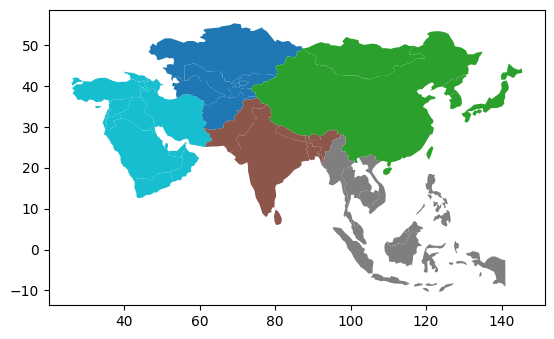

In [9]:
asia_languages_gpd.plot(column='Region')

In [10]:
asia_lang_geosource = GeoJSONDataSource(geojson = asia_languages_gpd.to_json())

TOOLTIPS = [('Country',"@Country"),
            ('Language', '@Language'),
            ('Search', '@Keyword')]

p = figure(title='Google Search: Asian Languages',
           tooltips=TOOLTIPS,
           x_range=(-180,180),
           y_range=(-90,90),
           x_axis_location=None,
           y_axis_location=None)

p.patches('xs', 'ys',
          fill_alpha=1,
          fill_color='yellow',
          line_color='black',
          line_width=0.5,
          source=asia_lang_geosource)

p.background_fill_color = "aqua"

# curdoc().add_root(column(p))